In [2]:
!git clone https://github.com/cloner174/mr.Sina.git

Cloning into 'mr.Sina'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 229 (delta 77), reused 121 (delta 22), pack-reused 0
Receiving objects: 100% (229/229), 24.34 MiB | 11.06 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [3]:
%cd mr.Sina

/content/mr.Sina


In [1]:
# Import Packages :

import pandas as pd
from main import DataHandle


In [2]:
# Loading data

data = pd.read_csv( 'input/link_dataFinal.csv' , index_col=0)
nodes = pd.read_csv( './input/nodes.csv' )

print(data.shape, nodes.shape)
#((969395, 3), (8977, 5))
data = data.sample(frac=0.01)
nodes_list = []
sors = []
advs = []
pubs = []
for i in data['source'] :
  if i in nodes['id'].tolist():
    if i not in nodes_list:
      sors.append(i)
      nodes_list.append(i)
      index = nodes.index[nodes['id'] == i].tolist()[0]
      if list(nodes.iloc[[index]]['color'] == 'red')[0]:
        advs.append(i)
      else:
        pubs.append(i)
tar = []
for i in data['target'] :
  if i in nodes['id'].tolist():
    if i not in nodes_list:
      tar.append(i)
      nodes_list.append(i)
      index = nodes.index[nodes['id'] == i].tolist()[0]
      if list(nodes.iloc[[index]]['color'] == 'red')[0]:
        advs.append(i)
      else:
        pubs.append(i)

advs_ = list(set(advs))
pubs_ = list(set(pubs))
len(advs_), len(pubs_) #(4299, 1946)
len(nodes_list)# تعداد کل نود ها 6245

(199981, 4) (8977, 5)


1548

In [3]:
# Finding the nodes from data to pass to the DataHandel class!

data.columns

Index(['X_igraph_index', 'source', 'target', 'key'], dtype='object')

In [4]:
data = pd.read_csv( 'input/links.csv' , index_col=0)

data = data.sample(frac=1, random_state=32)

links_ = []
sources_ = []
targets_ = []
for i in range(data.shape[0]) :
    sor_ = data.loc[i, 'source']
    tar_ = data.loc[i, 'target']
    if sor_ in nodes_list and tar_ in nodes_list:
        sources_.append(sor_)
        targets_.append(tar_)
        links_.append( (sor_, tar_) )
        if len(links_) == 60000 :
            break
        else:
            continue

In [5]:
len(links_) # تعداد کل لینک ها 199981

60000

In [ ]:
"""
nodes_list = []
sors = []
advs = []
pubs = []
for i in data['source'] :
  if i in nodes['id'].tolist():
    if i not in nodes_list:
      sors.append(i)
      nodes_list.append(i)
      index = nodes.index[nodes['id'] == i].tolist()[0]
      if list(nodes.iloc[[index]]['color'] == 'red')[0]:
        advs.append(i)
      else:
        pubs.append(i)
tar = []
for i in data['target'] :
  if i in nodes['id'].tolist():
    if i not in nodes_list:
      tar.append(i)
      nodes_list.append(i)
      index = nodes.index[nodes['id'] == i].tolist()[0]
      if list(nodes.iloc[[index]]['color'] == 'red')[0]:
        advs.append(i)
      else:
        pubs.append(i)
"""

In [6]:
advs_ = list(set(advs))
pubs_ = list(set(pubs))

len(advs_), len(pubs_) #(4299, 1946)

(607, 941)

In [7]:
name_laybel1 = [ 'a_node' for i in range( len(advs ))]
name_laybel2 = [ 'p_node' for i in range( len(pubs ))]
name_laybel = name_laybel1.copy()
name_laybel.extend(name_laybel2)
id_laybel = advs.copy()
id_laybel.extend(pubs)
nodes = {
    'name' : name_laybel,
    'id' : id_laybel
}

In [8]:
links = {
    'source' : sources_,
    'target' : targets_
}

In [9]:
# getting data ready by turnnig to dicts both !
print(type(nodes), type(links))

<class 'dict'> <class 'dict'>


In [10]:
# This will prepare and preprocess the data :

Start = DataHandle( data_links= links, data_nodes= nodes)

In [11]:
Start.initial_keys()

name


In [12]:
layer_one_links, layer_two_links, interconnected_links = Start.modify_links()

Getting things Ready...


In [13]:
print( 'داده استفاده شده برای ترین وتست - لایه اول لینک ها', len(layer_one_links))
print( 'داده استفاده شده برای ترین وتست - لایه دوم لینک ها', len(layer_two_links))
print( 'داده استفاده شده برای ترین وتست -بین لایه ای لینک ها', len(interconnected_links))

داده استفاده شده برای ترین وتست - لایه اول لینک ها 16633
داده استفاده شده برای ترین وتست - لایه دوم لینک ها 28604
داده استفاده شده برای ترین وتست -بین لایه ای لینک ها 14763




داده ی اولیه !!

داده استفاده شده برای ترین وتست - لایه اول لینک ها 31570

داده استفاده شده برای ترین وتست - لایه دوم لینک ها 137300

داده استفاده شده برای ترین وتست -بین لایه ای لینک ها 31111


In [14]:
print( 'داده استفاده شده برای ترین وتست - نود ها ادورتایزرز', len(advs))
print( 'داده استفاده شده برای ترین وتست - نود ها پابلیشرز', len(pubs))

داده استفاده شده برای ترین وتست - نود ها ادورتایزرز 607
داده استفاده شده برای ترین وتست - نود ها پابلیشرز 941


In [15]:
from main import Graph

In [16]:
G = Graph(layer_one_name= 'Advertisers', layer_two_name= 'Publishers', nx_use = True )

In [17]:
# This is another use of add_links method for simple data :
G_layer1, G_layer2 , G_interconnected = G.add_links( layer_one_links = layer_one_links ,
                                            layer_two_links = layer_two_links ,
                                            Interconnected_links = interconnected_links,
                                            layer_one_nodes = advs,
                                            layer_two_nodes = pubs)

In [18]:
print(' گراف برای لایه ی اول ', G_layer1)
print(' گراف برای لایه ی دوم' , G_layer2)
print( ' گراف برای لایه بینابینی  ', G_interconnected)

 گراف برای لایه ی اول  Graph with 607 nodes and 16633 edges
 گراف برای لایه ی دوم Graph with 941 nodes and 28604 edges
 گراف برای لایه بینابینی   Graph with 1548 nodes and 45237 edges


In [ ]:
# گراف برای تست  Graph with 3723 nodes and 14987 edges
 #گراف برای ترین Graph with 1740 nodes and 67272 edges
 # گراف برای ارزیابی نهایی  Graph with 5463 nodes and 95553 edges

In [19]:
# Another one, This time with another approach :

G_combined = G.add_links( layer_one_links = layer_one_links ,
                            layer_two_links = layer_two_links ,
                            Interconnected_links = interconnected_links,
                            layer_one_nodes = advs,
                            layer_two_nodes = pubs,
                            combine_layers_no_self_layer = True)

In [20]:
print( ' گراف برای لایه همه ی نود ها به جزلینک های هم خانواده  ', G_combined)

 گراف برای لایه همه ی نود ها به جزلینک های هم خانواده   Graph with 1548 nodes and 9944 edges


In [77]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [22]:
# Centrality Measures :

def calculate_centrality_measures(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    return degree_centrality, betweenness_centrality, closeness_centrality

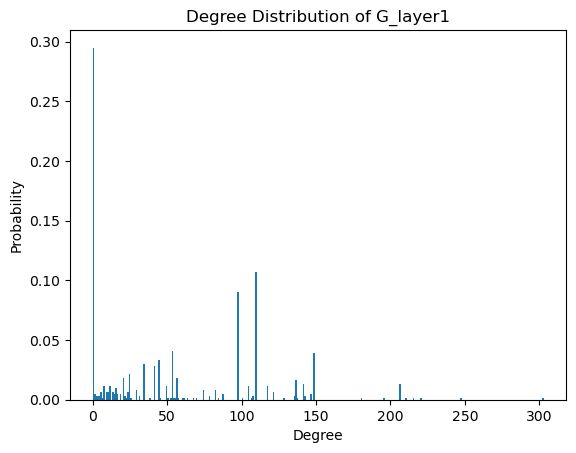

In [59]:
degrees = [G_layer1.degree(node) for node in G_layer1.nodes()]

# Plot degree distribution
plt.hist(degrees, bins=range(max(degrees)+1), density=True)
plt.title("Degree Distribution of G_layer1")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.show()

In [ ]:
degree_centrality = nx.degree_centrality(G_layer1)

degree_values = list(degree_centrality.values())
plt.figure(figsize=(10, 6))
sns.histplot(degree_values, bins = 20, kde=True, color='blue')
plt.title('Degree Centrality Distribution G_layer1')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.ylim(0,100)
plt.show()

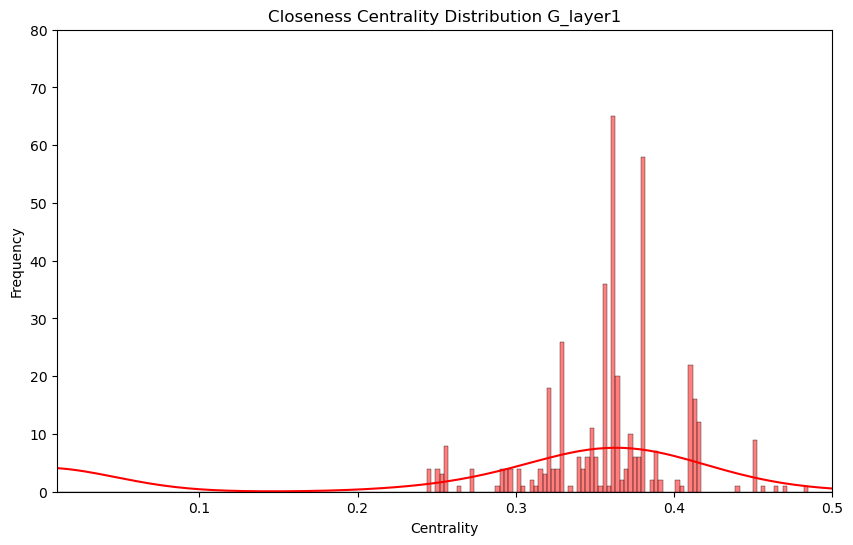

In [61]:
closeness_centrality = nx.closeness_centrality(G_layer1)

closeness_values = list(closeness_centrality.values())
plt.figure(figsize=(10, 6))
sns.histplot(closeness_values,  bins = 200, kde=True, color='red')
plt.title('Closeness Centrality Distribution G_layer1')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.xlim(0.01, 0.5)
plt.ylim(0,80)
plt.show()


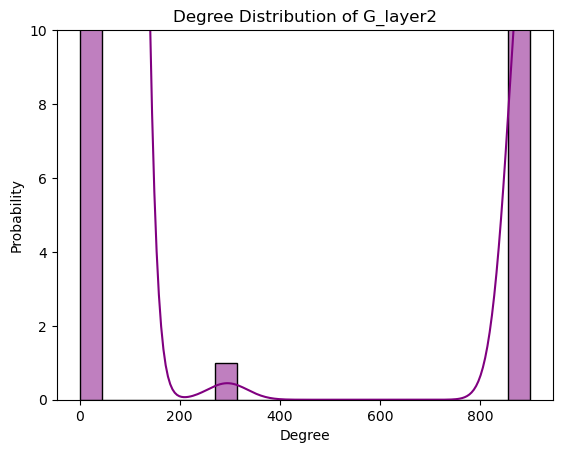

In [57]:
degrees = [G_layer2.degree(node) for node in G_layer2.nodes()]

# Plot degree distribution
sns.histplot(degrees, bins = 20, kde=True, color='purple')
plt.title("Degree Distribution of G_layer2")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.ylim(0,10)
plt.show()

In [ ]:
degree_centrality = nx.degree_centrality(G_layer2)
closeness_centrality = nx.closeness_centrality(G_layer2)

degree_values = list(degree_centrality.values())
plt.figure(figsize=(10, 6))
sns.histplot(degree_values, bins = 20, kde=True, color='red')
plt.title('Degree Centrality Distribution G_layer2')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.ylim(0,25)
plt.show()

closeness_values = list(closeness_centrality.values())
plt.figure(figsize=(10, 6))
sns.histplot(closeness_values, kde=True, color='blue')
plt.title('Closeness Centrality Distribution G_layer2')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.ylim(0,150)
plt.show()


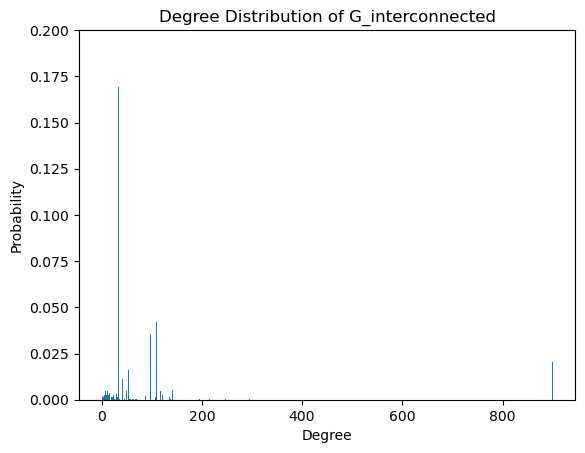

In [72]:

degrees = [G_interconnected.degree(node) for node in G_interconnected.nodes()]

# Plot degree distribution
plt.hist(degrees, bins=range(max(degrees)+1), density=True)
plt.title("Degree Distribution of G_interconnected")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.ylim(0,0.2)
plt.show()

In [ ]:

degree_centrality = nx.degree_centrality(G_interconnected)
closeness_centrality = nx.closeness_centrality(G_interconnected)

degree_values = list(degree_centrality.values())
plt.figure(figsize=(10, 6))
sns.histplot(degree_values, bins = 20, kde=True, color='blue')
plt.title('Degree Centrality Distribution G_interconnected')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.show()

closeness_values = list(closeness_centrality.values())
plt.figure(figsize=(10, 6))
sns.histplot(closeness_values, kde=True, color='red')
plt.title('Closeness Centrality Distribution G_interconnected')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.show()


In [73]:
degree_centrality = nx.degree_centrality(G_combined)
closeness_centrality = nx.closeness_centrality(G_combined)
degrees = [G_combined.degree(node) for node in G_combined.nodes()]

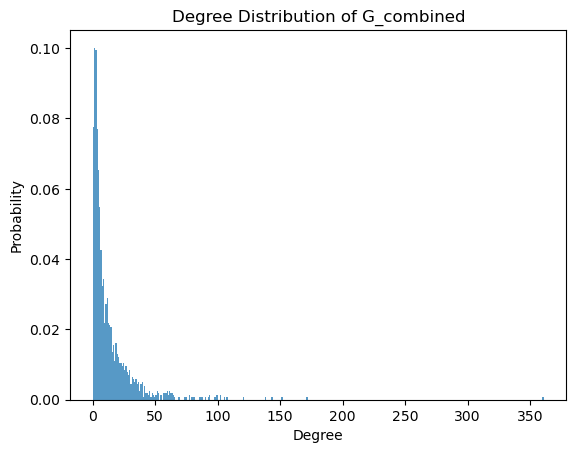

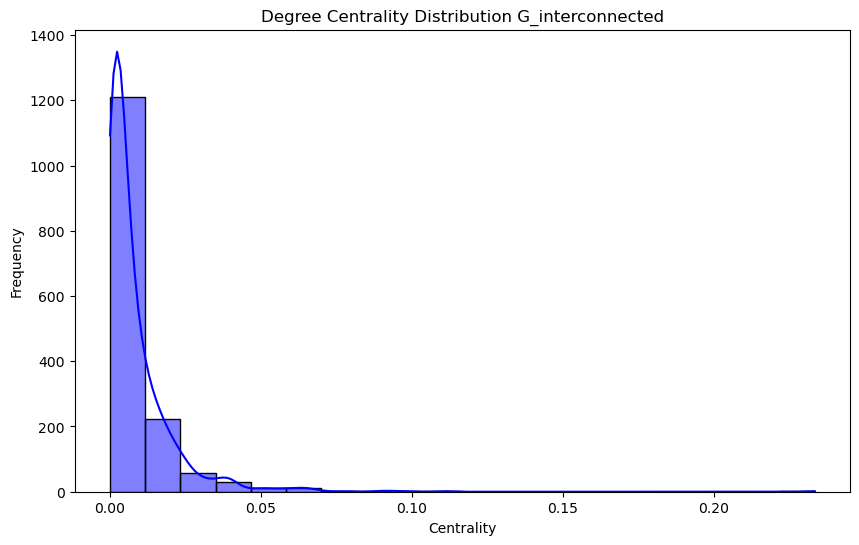

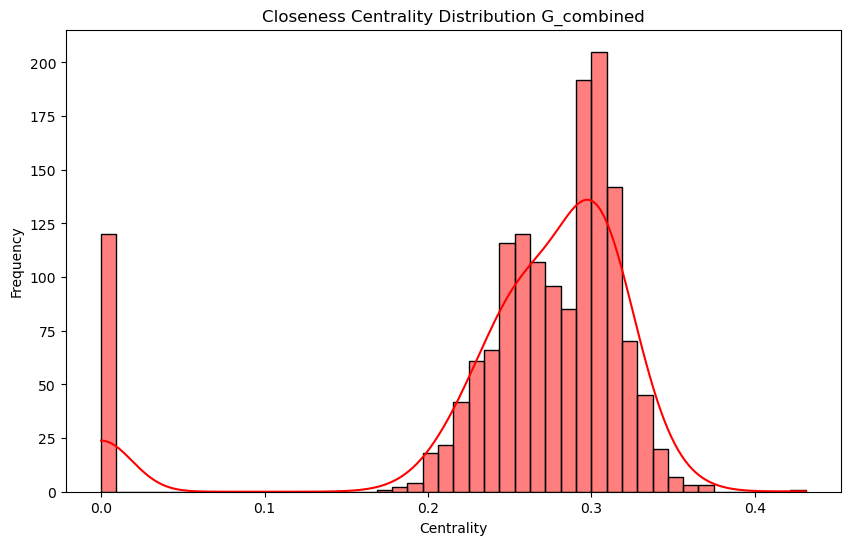

In [74]:
# Plot degree distribution
plt.hist(degrees, bins=range(max(degrees)+1), density=True, alpha=0.75)
plt.title("Degree Distribution of G_combined")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.show()

degree_values = list(degree_centrality.values())
plt.figure(figsize=(10, 6))
sns.histplot(degree_values, bins = 20, kde=True, color='blue')
plt.title('Degree Centrality Distribution G_interconnected')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.show()

closeness_values = list(closeness_centrality.values())
plt.figure(figsize=(10, 6))
sns.histplot(closeness_values, kde=True, color='red')
plt.title('Closeness Centrality Distribution G_combined')
plt.xlabel('Centrality')
plt.ylabel('Frequency')
plt.show()

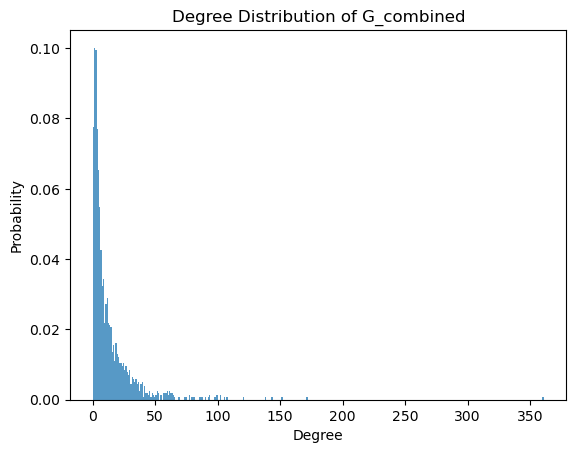

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Get the degree of each node
degrees = [G_combined.degree(node) for node in G_combined.nodes()]

# Plot degree distribution
plt.hist(degrees, bins=range(max(degrees)+1), density=True, alpha=0.75)
plt.title("Degree Distribution of G_combined")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.show()


In [ ]:
# حال می خواهیم ببینیم با استخراج یک سری ویژگی های ابتدایی از گراف های مان آیا مدل رگرسیون لاجستیک میتواند پیش بینی کننده خوبی باشد یا نه

In [80]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [78]:
# Helper function to create feature set for Logistic Regression
def create_features(graph, edge_list):
    # Feature dictionary
    features = {
        'common_neighbors': [],
        'jaccard_coefficient': [],
        'preferential_attachment': []
    }
    labels = []

    for u, v in edge_list:
        # Common Neighbors
        common_neighbors = list(nx.common_neighbors(graph, u, v))
        features['common_neighbors'].append(len(common_neighbors))

        # Jaccard Coefficient
        jaccard_coeff = list(nx.jaccard_coefficient(graph, [(u, v)]))[0][2]
        features['jaccard_coefficient'].append(jaccard_coeff)

        # Preferential Attachment
        pref_attach = graph.degree(u) * graph.degree(v)
        features['preferential_attachment'].append(pref_attach)

        # Label (1 if edge exists, 0 otherwise)
        labels.append(1 if graph.has_edge(u, v) else 0)

    # Create Array
    feature_df = pd.DataFrame(features)
    feature_arr = np.array(feature_df)
    labels_arr =  np.array(labels)
    return feature_arr, labels_arr


In [ ]:
# Create features and labels for training and test data
features1, labels1 = create_features(G_layer1, list(G_layer1.edges) + list(nx.non_edges(G_layer1)))
features2, labels2 = create_features(G_layer2, list(G_layer2.edges) + list(nx.non_edges(G_layer2)))
features3, labels3 = create_features(G_interconnected, list(G_interconnected.edges) + list(nx.non_edges(G_interconnected)))

#Just a look!
features1.shape, labels1.shape

In [79]:
features_combine, labels_combine = create_features(G_combined, list(G_combined.edges) + list(nx.non_edges(G_combined)))

#Just a look!
features_combine.shape, labels_combine.shape

((1197378, 3), (1197378,))

In [82]:
X_train_combine, X_test_combine, y_train_combine, y_test_combine = train_test_split(features_combine, labels_combine, test_size=0.2, random_state=16)

In [83]:
print( 'دیتای تمرین -تعداد نمونه ها و تعداد ویژگی ها ' ,X_train_combine.shape )
print('دیتای تمرین - تعداد لیبل ها (گویای اینکه آیا کانکت اند آن دو نود یا خیر) ' ,y_train_combine.shape)

print( ' دیتای تست -  تعداد نمونه ها و تعداد ویژگی ها', X_test_combine.shape )
print('دیتای تست - تعداد لیبل ها (گویای اینکه آیا کانکت اند آن دو نود یا خیر) ' ,y_test_combine.shape)


دیتای تمرین -تعداد نمونه ها و تعداد ویژگی ها  (957902, 3)
دیتای تمرین - تعداد لیبل ها (گویای اینکه آیا کانکت اند آن دو نود یا خیر)  (957902,)
 دیتای تست -  تعداد نمونه ها و تعداد ویژگی ها (239476, 3)
دیتای تست - تعداد لیبل ها (گویای اینکه آیا کانکت اند آن دو نود یا خیر)  (239476,)


In [137]:
# ترکیب همه ی ویژگی ها برای اینکه دیتای ما شامل هر سه لایه شود

features = np.concatenate((features1, features2, features3))
laybels = np.concatenate((labels1, labels2, labels3))

In [138]:
# مقدار دیتای خود را به وسیله ی تابع زیر از ماژول اسیکیت لرن با ضریب ۸۰ به ۲۰ به دو گروه ترین و تست تقسیم میکنیم

train_features, test_features, train_labels, test_labels = train_test_split(features, laybels, test_size=0.2, random_state=16)

In [139]:
print( 'دیتای تمرین -تعداد نمونه ها و تعداد ویژگی ها ' ,train_features.shape )
print('دیتای تمرین - تعداد لیبل ها (گویای اینکه آیا کانکت اند آن دو نود یا خیر) ' ,train_labels.shape)

print( ' دیتای تست -  تعداد نمونه ها و تعداد ویژگی ها', test_features.shape )
print('دیتای تست - تعداد لیبل ها (گویای اینکه آیا کانکت اند آن دو نود یا خیر) ' ,test_labels.shape)


دیتای تمرین -تعداد نمونه ها و تعداد ویژگی ها  (1385825, 3)
دیتای تمرین - تعداد لیبل ها (گویای اینکه آیا کانکت اند آن دو نود یا خیر)  (1385825,)
 دیتای تست -  تعداد نمونه ها و تعداد ویژگی ها (346457, 3)
دیتای تست - تعداد لیبل ها (گویای اینکه آیا کانکت اند آن دو نود یا خیر)  (346457,)


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [141]:

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(train_features, train_labels)

# Predict on the test set
test_predictions = logistic_model.predict(test_features)
test_probabilities = logistic_model.predict_proba(test_features)[:, 1]

#
accuracy = accuracy_score(test_labels, test_predictions)

# Precision
precision = precision_score(test_labels, test_predictions)

# sensitivity
recall = recall_score(test_labels, test_predictions)

#
f1 = f1_score(test_labels, test_predictions)

#
roc_auc = roc_auc_score(test_labels, test_predictions)

#
conf_matrix = confusion_matrix(test_labels, test_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9862407167411829
Precision: 0.918308163711972
Recall: 0.8367652191254924
F1 Score: 0.8756423968904078
ROC AUC Score: 0.9160955384843149
Confusion Matrix:
 [[324907   1493]
 [  3274  16783]]


In [85]:

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_combine, y_train_combine)

# Predict on the test set
test_predictions = logistic_model.predict(X_test_combine)
#test_probabilities = logistic_model.predict_proba(X_test_combine)[:, 1]

#
accuracy = accuracy_score(y_test_combine, test_predictions)

# Precision
precision = precision_score(y_test_combine, test_predictions)

# sensitivity
recall = recall_score(y_test_combine, test_predictions)

#
f1 = f1_score(y_test_combine, test_predictions)

#
roc_auc = roc_auc_score(y_test_combine, test_predictions)

#
conf_matrix = confusion_matrix(y_test_combine, test_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9916567839783528
Precision: 0.42777777777777776
Recall: 0.07913669064748201
F1 Score: 0.13356461405030357
ROC AUC Score: 0.5391347158874592
Confusion Matrix:
 [[237324    206]
 [  1792    154]]


ابتدا سری به روش جنگل تصادفی میزنیم چون با استخراج ویژگی های عددی الان یک پیش بینی پیژگی محور محض را داریم\\

باید حلقه ی ویژگی ها ۳ بار تککرار شود


In [ ]:
# اما این بار با یک سری اطلاعات کامل تر از هر گراف
# در نهایت دیتای حاصل را تجمیع میکنیم

In [142]:
G = G_layer1

In [143]:
G = G_layer2

In [144]:
G = G_interconnected

In [86]:
G = G_combined

In [87]:

from itertools import combinations

# Graph
degree_centrality, betweenness_centrality, closeness_centrality = calculate_centrality_measures(G)
features = []
labels = []

# Calculating features for each pair of nodes:
for node1, node2 in combinations(G.nodes(), 2):

    # Centrality measures for node1 and node2
    degree_centrality_1 = degree_centrality[node1]
    degree_centrality_2 = degree_centrality[node2]
    betweenness_centrality_1 = betweenness_centrality[node1]
    betweenness_centrality_2 = betweenness_centrality[node2]
    closeness_centrality_1 = closeness_centrality[node1]
    closeness_centrality_2 = closeness_centrality[node2]

    # Directly compute and append features
    features.append((
        node1,
        node2,
        len(list(nx.common_neighbors(G, node1, node2))),  # Common Neighbors
        next(nx.preferential_attachment(G, [(node1, node2)]))[2],  # Preferential Attachment
        next(nx.resource_allocation_index(G, [(node1, node2)]))[2],  # Resource Allocation
        next(nx.adamic_adar_index(G, [(node1, node2)]))[2],  # Adamic Adar
        next(nx.jaccard_coefficient(G, [(node1, node2)]))[2] , # Jaccard Coefficient
        (degree_centrality_1 + degree_centrality_2) / 2,
        (betweenness_centrality_1 + betweenness_centrality_2) / 2,
        (closeness_centrality_1 + closeness_centrality_2) / 2
    ))

    # Existence of links between nodes (1 or 0)
    labels.append(1 if G.has_edge(node1, node2) else 0)

# Creating a DataFrame from the features and labels
features_df = pd.DataFrame(features,
                            columns=['node1','node2','Common Neighbors',
                                    'Preferential Attachment', 'Resource Allocation',
                                    'Adamic Adar', 'Jaccard Coefficient', 'Average Degree Centrality',
                                    'Average Betweenness Centrality', 'Average Closeness Centrality'])

features_df['Label'] = labels

# Now features_df is ready to use in a machine learning model


In [ ]:
features_df.to_csv('G-Layer1-dataframe.csv', index=False,
                   compression = {'method': 'zip', 'compresslevel': 1 } )

# This furtehr can be loaded using compression='zip' !

In [ ]:
features_df.to_csv('G-Layer2-dataframe.csv', index=False,
                   compression = {'method': 'zip', 'compresslevel': 1 } )
# This furtehr can be loaded using compression='zip' !

In [ ]:
features_df.to_csv('G-interconnected-dataframe.csv', index=False,
                    compression = {'method': 'zip', 'compresslevel': 8 } )
# This furtehr can be loaded using compression='zip' !

In [88]:
features_df.to_csv('output/G-combined-dataframe.csv', index=False,
                    compression = {'method': 'zip', 'compresslevel': 8 } )
# This furtehr can be loaded using compression='zip' !

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
%cd ..

/content


In [2]:
%cd ./mr.Sina

/content/mr.Sina


In [4]:
data1 = pd.read_csv('/content/mr.Sina/Archive/csv/G-Layer1-dataframe.csv', compression='zip')
data2 = pd.read_csv('/content/mr.Sina/Archive/csv/G-Layer2-dataframe.csv', compression='zip')
data3 = pd.read_csv('/content/mr.Sina/Archive/csv/G-inBetweenLayers-dataframe.csv', compression='zip')

In [5]:
y1 = data1['Label']  # Labels
X1 = data1.drop(['node1','node2','Label'], axis=1)  # Features

In [6]:
y2 = data2['Label']  # Labels
X2 = data2.drop(['node1','node2','Label'], axis=1)  # Features

In [7]:
X3 = data3.drop(['node1','node2','Label'], axis=1)  # Features
y3 = data3['Label']  # Labels

In [89]:
#X = features_df.drop(['node1','node2','Label'], axis=1)  # Features
#y = features_df['Label']  # Labels

In [8]:
X = np.concatenate((X1, X2, X3))
y = np.concatenate((y1, y2, y3))

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [11]:
print( '\n تجمیع هر سه لایه برای تمرین مدل - اندازه ی ایکس ترین', X_train.shape)
print( '\n تجمیع هر سه لایه برای تمرین مدل - اندازه ی ایکس تست', X_test.shape)

print( '\n تجمیع هر سه لایه برای تمرین مدل - اندازه ی وای ترین', y_train.shape)
print('\n تجمیع هر سه لایه برای تمرین مدل - اندازه ی وای تست ', y_test.shape)


 تجمیع هر سه لایه برای تمرین مدل - اندازه ی ایکس ترین (1411560, 8)

 تجمیع هر سه لایه برای تمرین مدل - اندازه ی ایکس تست (352890, 8)

 تجمیع هر سه لایه برای تمرین مدل - اندازه ی وای ترین (1411560,)

 تجمیع هر سه لایه برای تمرین مدل - اندازه ی وای تست  (352890,)





 تجمیع هر سه لایه برای تمرین مدل - اندازه ی ایکس ترین (1411560, 8)

 تجمیع هر سه لایه برای تمرین مدل - اندازه ی ایکس تست (352890, 8)

 تجمیع هر سه لایه برای تمرین مدل - اندازه ی وای ترین (1411560,)

 تجمیع هر سه لایه برای تمرین مدل - اندازه ی وای تست  (352890,)


In [92]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix

i = 1

# Prepare data
x = X_train
Y = y_train


# model :
clf = RandomForestClassifier(n_estimators=100, random_state=64, verbose = 2, max_depth=100, min_samples_split= 50)


# Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 64)

for train_index, test_index in skf.split(x, Y):
    print( ' Epcho Number : ', i)
    i += 1
    x_train, x_val = X[train_index], X[test_index]
    Y_train, Y_val = y[train_index], y[test_index]

    # Train model
    clf.fit(x_train, Y_train)

    # Predict probabilities
    predict = clf.predict(x_val)

    # Calculate precision, recall, F1 score, and support
    precision, recall, f1_score, support = precision_recall_fscore_support(Y_val, predict)

    if i == 2 or i == 100 :

      # Print the evaluation metrics for the positive class (class 1)
      print("Precision for class 1:", precision[1])
      print("Recall for class 1:", recall[1])
      print("F1 Score for class 1:", f1_score[1])
      print("Support for class 1:", support[1])
    else:
      continue

In [93]:
clf = RandomForestClassifier(n_estimators=100, random_state=64, verbose = 2, max_depth=100, min_samples_split= 50)

In [94]:
clf.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   60.0s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

RandomForestClassifier(max_depth=100, min_samples_split=50, random_state=64,
                       verbose=2)

In [12]:
#from google.colab import drive
#drive.mount('/content/driv')

In [95]:
predict = clf.predict(X_test)

# Calculate metrics
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, predict, average='binary')
accuracy = accuracy_score(y_test, predict)
print(f"Average Accuracy: {accuracy}")
print(f"Average Precision: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {fscore}")

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.0s


Average Accuracy: 0.9923791945748217
Average Precision: 0.7964601769911505
Average Recall: 0.09188361408882083
Average F1-Score: 0.16475972540045766


**Start:**

Average Accuracy: 0.9856966760180226

Average Precision: 0.9558359621451105

Average Recall: 0.7770226952173356

Average F1-Score: 0.8572034797368979

**End :**

Average Accuracy: 0.9863909433534529

Average Precision: 0.9573518090839107

Average Recall: 0.7908929025693208

Average F1-Score: 0.8661976736086925

In [99]:
# unseen Data :

predict = clf.predict(X_test)

accuracy_ = accuracy_score(y_test, predict)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, predict, average='binary')

print(f"Average Accuracy: {accuracy_}")
print(f"Average Precision: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {fscore}")


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.0s


Average Accuracy: 0.9923791945748217
Average Precision: 0.7964601769911505
Average Recall: 0.09188361408882083
Average F1-Score: 0.16475972540045766


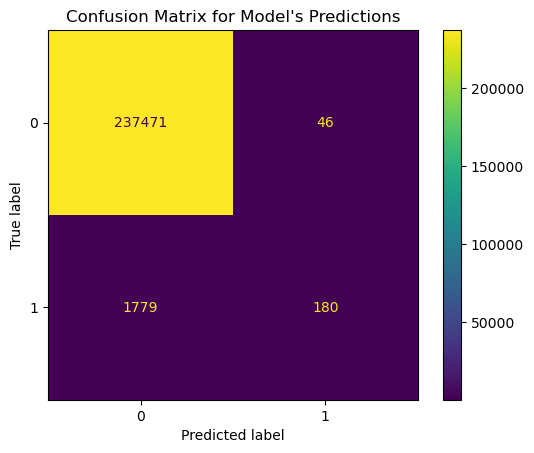

Accuracy: 0.9923791945748217
Precision: 0.7964601769911505
Recall: 0.09188361408882083
F1 Score: 0.16475972540045766


In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predict)
plt.title("Confusion Matrix for Model's Predictions")
plt.show()

print("Accuracy:", accuracy_)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", fscore)

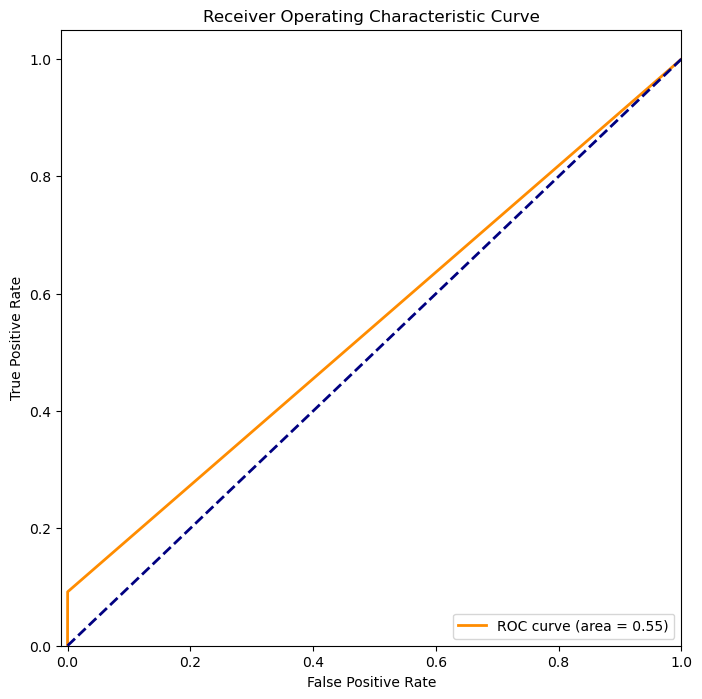

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, predict)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [22]:
# Accuracy
accuracy = accuracy_score(y_test, predict)

# Precision
precision = precision_score(y_test, predict)

# Recall (Sensitivity)
recall = recall_score(y_test, predict)

# F1 Score
f1 = f1_score(y_test, predict)

# ROC AUC Score (if y_pred contains probabilities)
roc_auc = roc_auc_score(y_test, predict)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predict)

In [23]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9939074499135708
Precision: 0.9930085451115304
Recall: 0.8983935742971888
F1 Score: 0.943334563280797
ROC AUC Score: 0.9490075809137986
Confusion Matrix:
 [[332844    126]
 [  2024  17896]]


In [102]:
predict_prob = clf.predict_proba(X_test)[:,1]

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.0s


In [25]:
# Creating DataFrame
X_test_results_df = pd.DataFrame({
    'Actual from X_test': y_test,
    'Predicted from X_test': predict,


})

X_test_results_df_prob = pd.DataFrame({
    'Actual from X_test': y_test,
    'Predicted Prob from X_test': predict_prob,
})

# Saving DataFrame to CSV
csv_path = 'output/X_test_results_df.csv'
X_test_results_df.to_csv(csv_path, index=False)

csv_path = 'output/X_test_results_df_prob.csv'
X_test_results_df_prob.to_csv(csv_path, index=False)

print("Saved predictions and actual labels")



Saved predictions and actual labels


In [ ]:
# Confusion Matrix Guide :
#    [ [TN    FP]
#      [FN    TP] ]

In [ ]:
#%pip install torch_geometric

بگذارید رگرسیون را تست کنیم

In [ ]:
# data1 = train, data2 = train , data3 = test

In [1]:
X1 = data1.drop(['node1','node2','Label'], axis=1)  # Features
y1 = data1['Label']  # Labels

X2 = data2.drop(['node1','node2','Label'], axis=1)  # Features
y2 = data2['Label']  # Labels

X3 = data3.drop(['node1','node2','Label'], axis=1)  # Features
y3 = data3['Label']  # Labels

NameError: name 'data1' is not defined

In [202]:
X = np.concatenate((X1, X2, X3))
y = np.concatenate((y1, y2, y3))

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

In [ ]:
# (RBF) kernel
#svc_model = SVC(kernel='rbf', C=1.0, gamma='scale')
#svc_model.fit(X_train, y_train)

# Train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate precision, recall, F1 score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

# Print the evaluation metrics for the positive class (class 1)
print("Precision for class 1:", precision[1])
print("Recall for class 1:", recall[1])
print("F1 Score for class 1:", f1_score[1])
print("Support for class 1:", support[1])


In [ ]:
epchoes = 1000
i = 1
# Prepare data
x = np.array(X_train)
Y = np.array(y_train)


# model :
svm_model = SVC(kernel='linear')

# Stratified K-Fold
skf = StratifiedKFold(n_splits = epchoes, shuffle=True, random_state=42)

for train_index, test_index in skf.split(x, Y):
    print( ' Epcho Number : ', i)
    i += 1
    x_train, x_val = X[train_index], X[test_index]
    Y_train, Y_val = y[train_index], y[test_index]

    # Train model
    svm_model.fit(x_train, Y_train)

    # Predict probabilities
    predict = svm_model.predict(x_val)

    # Calculate precision, recall, F1 score, and support
    precision, recall, f1_score, support = precision_recall_fscore_support(Y_val, predict)

    # Print the evaluation metrics for the positive class (class 1)
    print("Precision for class 1:", precision[1])
    print("Recall for class 1:", recall[1])
    print("F1 Score for class 1:", f1_score[1])
    print("Support for class 1:", support[1])


 Epcho Number :  1


In [16]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix

In [ ]:
#
predict = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#Generate and print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


In [ ]:
# Example: Perform grid search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'sigmoid', 'polynomial']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
train_features = X_train
train_labels = y_train

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(
    random_state=64,  # reproducibility
    max_iter=1000,    # iterations for optimization
    solver='newton-cg',  # Optimization algorithm ('newton-cg' is a good choice for small to medium datasets)
    penalty='l2',     # Regularization type ('l2' regularization is commonly used)
    C=1.0,            # Inverse of regularization strength (smaller values indicate stronger regularization)
    class_weight=None  # Weights associated with classes (can be 'balanced' for handling class imbalance)
)


LogisticRegression(max_iter=1000, random_state=64, solver='newton-cholesky')

In [20]:
epchoes = 1000
i = 1
# Prepare data
x = np.array(X_train)
Y = np.array(y_train)


# model :
logistic_model = LogisticRegression(
    random_state=64,  # reproducibility
    max_iter=1000,    # iterations for optimization
    solver='newton-cg',  # Optimization algorithm ('newton-cg' is a good choice for small to medium datasets)
    penalty='l2',     # Regularization type ('l2' regularization is commonly used)
    C=1.0,            # Inverse of regularization strength (smaller values indicate stronger regularization)
    class_weight=None  # Weights associated with classes (can be 'balanced' for handling class imbalance)
)


# Stratified K-Fold
skf = StratifiedKFold(n_splits = epchoes, shuffle=True, random_state=42)

for train_index, test_index in skf.split(x, Y):
    print( ' Epcho Number : ', i)
    i += 1
    x_train, x_val = X[train_index], X[test_index]
    Y_train, Y_val = y[train_index], y[test_index]

    # Train model
    logistic_model.fit(x_train, Y_train)

    # Predict probabilities
    predict = logistic_model.predict(x_val)

    # Calculate precision, recall, F1 score, and support
    precision, recall, f1_score, support = precision_recall_fscore_support(Y_val, predict)

    # Print the evaluation metrics for the positive class (class 1)
    print("Precision for class 1:", precision[1])
    print("Recall for class 1:", recall[1])
    print("F1 Score for class 1:", f1_score[1])
    print("Support for class 1:", support[1])


 Epcho Number :  1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


KeyboardInterrupt: 

In [107]:
# Predict on the test set
test_predictions = clf.predict(X_test)
test_probabilities = clf.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.0s


In [109]:
# Calculate metrics
roc_auc = roc_auc_score(y_test, test_probabilities.astype(int))
accuracy = accuracy_score(y_test, test_probabilities.astype(int))

roc_auc, accuracy

(0.5, 0.9918196395463429)

In [110]:
#
accuracy = accuracy_score(y_test, test_predictions)

#
precision = precision_score(y_test, test_predictions)

# (sensitivity)
recall = recall_score(y_test, test_predictions)

#
f1 = f1_score(y_test, test_predictions)

#
roc_auc = roc_auc_score(y_test, test_predictions)

#
conf_matrix = confusion_matrix(y_test, test_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9923791945748217
Precision: 0.7964601769911505
Recall: 0.09188361408882083
F1 Score: 0.16475972540045766
ROC AUC Score: 0.5458449718705071
Confusion Matrix:
 [[237471     46]
 [  1779    180]]


مقادیر F1 Score و Recall میزان پایینی از موفقیت را در تشخیص مدل در موارد مرزی نشان میدهند.
این بدان معناست که مدل مواردی که تارگت ۰ بوده را با تقریب مرزی بین ۰ تا ۵ درصد ، ۱ پیش بینی کرده است

In [113]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# feature scaling and logistic regression with SGD
#logistic_model = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge', max_iter=1000, random_state=42))

# Train the model
#logistic_model.fit(X_train, y_train)


In [115]:
epchoes = 100
i = 1
# Prepare data
x = np.array(X_train)
Y = np.array(y_train)


# model :
logistic_model = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, random_state=42))

# Stratified K-Fold
skf = StratifiedKFold(n_splits = epchoes, shuffle=True, random_state=42)

for train_index, test_index in skf.split(x, Y):
    print( ' Epcho Number : ', i)
    i += 1
    x_train, x_val = X.loc[train_index], X.loc[test_index]
    Y_train, Y_val = y.loc[train_index], y.loc[test_index]

    # Train model
    logistic_model.fit(x_train, Y_train)

    # Predict probabilities
    predict = logistic_model.predict(x_val)

    # Calculate precision, recall, F1 score, and support
    precision, recall, f1_score, support = precision_recall_fscore_support(Y_val, predict)

    # Print the evaluation metrics for the positive class (class 1)
    print("Precision for class 1:", precision[1])
    print("Recall for class 1:", recall[1])
    print("F1 Score for class 1:", f1_score[1])
    print("Support for class 1:", support[1])


 Epcho Number :  1


/home/user/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision for class 1: 0.0
Recall for class 1: 0.0
F1 Score for class 1: 0.0
Support for class 1: 88
 Epcho Number :  2


/home/user/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision for class 1: 0.0
Recall for class 1: 0.0
F1 Score for class 1: 0.0
Support for class 1: 95
 Epcho Number :  3


/home/user/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision for class 1: 0.0
Recall for class 1: 0.0
F1 Score for class 1: 0.0
Support for class 1: 111
 Epcho Number :  4
Precision for class 1: 0.0
Recall for class 1: 0.0
F1 Score for class 1: 0.0
Support for class 1: 100
 Epcho Number :  5


/home/user/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision for class 1: 0.0
Recall for class 1: 0.0
F1 Score for class 1: 0.0
Support for class 1: 103
 Epcho Number :  6


/home/user/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision for class 1: 0.0
Recall for class 1: 0.0
F1 Score for class 1: 0.0
Support for class 1: 100
 Epcho Number :  7


/home/user/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision for class 1: 0.0
Recall for class 1: 0.0
F1 Score for class 1: 0.0
Support for class 1: 93
 Epcho Number :  8
Precision for class 1: 0.5
Recall for class 1: 0.02727272727272727
F1 Score for class 1: 0.05172413793103448
Support for class 1: 110
 Epcho Number :  9
Precision for class 1: 0.0
Recall for class 1: 0.0
F1 Score for class 1: 0.0
Support for class 1: 86
 Epcho Number :  10
Precision for class 1: 0.0
Recall for class 1: 0.0
F1 Score for class 1: 0.0
Support for class 1: 103
 Epcho Number :  11


/home/user/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision for class 1: 0.0
Recall for class 1: 0.0
F1 Score for class 1: 0.0
Support for class 1: 97
 Epcho Number :  12
Precision for class 1: 1.0
Recall for class 1: 0.011111111111111112
F1 Score for class 1: 0.02197802197802198
Support for class 1: 90
 Epcho Number :  13


/home/user/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision for class 1: 0.0
Recall for class 1: 0.0
F1 Score for class 1: 0.0
Support for class 1: 89
 Epcho Number :  14


/home/user/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision for class 1: 0.0
Recall for class 1: 0.0
F1 Score for class 1: 0.0
Support for class 1: 117
 Epcho Number :  15


KeyboardInterrupt: 

In [15]:
pred = logistic_model.predict(X_test)


In [18]:
#
accuracy = accuracy_score(y_test, pred)

#
precision = precision_score(y_test, pred)

# (sensitivity)
recall = recall_score(y_test, pred)

#
#f1 = f1_score(y_test, pred)

#
roc_auc = roc_auc_score(y_test, pred)

#
conf_matrix = confusion_matrix(y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
#print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.973830372070617
Precision: 0.9090421866625833
Recall: 0.5960341365461848
ROC AUC Score: 0.7962331237735879
Confusion Matrix:
 [[331782   1188]
 [  8047  11873]]


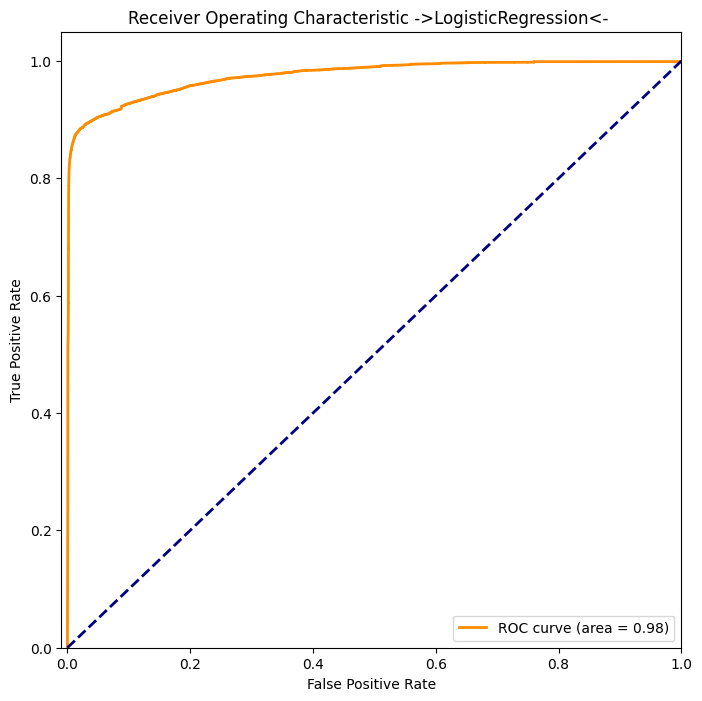

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, test_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic ->LogisticRegression<- ')
plt.legend(loc="lower right")
plt.show()


خب این به قطع دارای ناهمسانی و ناهمگنی بسیار بیشتر از مدل قبلی است

 هرچند که میانگین آن بالای ۹۰ درصد موفقیت را نشان میدهد

  اما تغییر زیاد در آن میتواند نشانه ی گیجی مدل در مواجهه با حالت های مختلف دیتا ی ما باشد

In [82]:

# This is our job in the creating feature part of this scripts, Beacuse it takes too much time,
# We rather to load it from its saved version !

data1 = pd.read_csv('/content/mr.Sina/Archive/csv/G-Layer1-dataframe.csv', compression='zip')
data2 = pd.read_csv('/content/mr.Sina/Archive/csv/G-Layer2-dataframe.csv', compression='zip')
data3 = pd.read_csv('/content/mr.Sina/Archive/csv/G-interconnected-dataframe.csv', compression='zip')
y1 = data1['Label']  # Labels
X1 = data1.drop(['node1','node2','Label'], axis=1)  # Features
y2 = data2['Label']  # Labels
X2 = data2.drop(['node1','node2','Label'], axis=1)  # Features
X3 = data3.drop(['node1','node2','Label'], axis=1)  # Features
y3 = data3['Label']  # Labels

In [83]:
# Aggregate the 3 layers we have !

X = np.concatenate((X1, X2, X3))
y = np.concatenate((y1, y2, y3))

In [84]:
# Split into both training and testing batches

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [15, 20],  # Number of trees in the forest
    'max_depth': [25, 50, 100],  # Maximum depth of the tree
    'min_samples_split': [10, 30]   # Minimum number of samples required to split an internal node
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=64)

# Create the grid search object
scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=100)

# Fit grid search to the data
x_train, x_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)
grid_search.fit(x_train, Y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Use the best parameters to make predictions
best_clf = grid_search.best_estimator_
predictions = best_clf.predict(x_val)
print("Test Accuracy: ", accuracy_score(Y_val, predictions))


In [ ]:
predictions = best_clf.predict(X_test)
probabilities = best_clf.predict_proba(X_test)[:, 1].astype(int)

In [ ]:
#
accuracy = accuracy_score(y_test, predictions)

#
precision = precision_score(y_test,  probabilities)

# sensitivity
recall = recall_score(y_test,  probabilities)

#
f1 = f1_score(y_test,  probabilities)

# beacuse this prediction contains probabilities!
roc_auc = roc_auc_score(y_test, probabilities)

#
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9939102836577971
Precision: 1.0
Recall: 0.7838353413654618
F1 Score: 0.8788202847976585
ROC AUC Score: 0.891917670682731
Confusion Matrix:
 [[332875     95]
 [  2054  17866]]


In [ ]:
#BEst One $#

In [ ]:
#BEst One $#

In [ ]:
#BEst One $#

In [ ]:
# Save the best clf model to a file ( finded by grid-search )

from joblib import dump

dump(best_clf, 'random_forest_model.joblib')

['random_forest_model.joblib']

**Later, to load the model**

from joblib import load

loaded_model = load('random_forest_model.joblib')



In [11]:
# Save the clf model from before
from joblib import dump
dump(clf, 'clf_model.joblib')

['clf_model.joblib']

**Later, to load the model**

from joblib import load

loaded_model = load('clf_model.joblib')

In [ ]:
# Save the Logistic Regression model from before

dump(logistic_model, 'logistic_model.joblib')

['logistic_model.joblib']

**Later, to load the model**

from joblib import load

loaded_model = load('logistic_model.joblib')

In [156]:
from joblib import load

loaded_model = load('/content/mr.Sina/Archive/random_forest_model.joblib')


In [157]:
loaded_model

RandomForestClassifier(max_depth=100, min_samples_split=50, n_estimators=20,
                       random_state=42)